In [1]:
# { 0: 4, 3: 3}
# ["yellow", "grey", "grey", "green", "grey"] 

In [2]:

def check_word(user, word):
    user = list(user)
    word = list(word)
    occurrencies = {}
    statuses = []
    
    for i in range(len(user)):
        #print(f"Lettera del utente n. {i}")
        u = user[i]
        status ="grey"
        for j in range(len(word)):
            w = word[j]
            if u == w:
                if i == j: 
                    status = "green"
                    #Qui farò tutti i controlli del caso
                    values = list(occurrencies.values())
                    
    
                    if j in values:
                        keys = [ key for key, v in occurrencies.items() if v in values ]
                        
                        for key in keys:
                            if statuses[key] != "green":
                                del occurrencies[key]
                                statuses[key] = "grey"
    
                        #print("PRIMA DELLA REMOVE")
                        #print(f"KEYS         -> {keys}")
                        #print(f"VALUES       -> {values}")
                        #print(f"OCCURRENCIES -> {occurrencies}")
                        values.remove(j)
                        #print("DOPO LA REMOVE")
                        #print(f"KEYS         -> {keys}")
                        #print(f"VALUES       -> {values}")
                        #print(f"OCCURRENCIES -> {occurrencies}")
                        for index in range(len(values)):
                            key = keys[index]
                            if values[index] not in occurrencies.values():
                                occurrencies[key] = values[index]
                                statuses[key] = "yellow"
                    
                    occurrencies[i] = j
                    break
    
                if i not in occurrencies.keys() and j not in occurrencies.values():
                    status = "yellow"
                    occurrencies[i] = j
    
        statuses.append(status)
    
    print(user)
    print(word)
    print(occurrencies)
    print(statuses)
    return statuses    
    

In [3]:
import random
import os
import json


# pip install colorama
from colorama import Fore
# pip install matplotlib
import matplotlib.pyplot as plt

print(Fore.GREEN + f"PROVA DI TESTO VERDE")
print(Fore.YELLOW + f"PROVA DI TESTO GIALLO")
print(Fore.RESET + "ASUDGAISGD")

PROVA DI TESTO VERDE
PROVA DI TESTO GIALLO
ASUDGAISGD


In [10]:
import requests



url = "https://wordsapiv1.p.rapidapi.com/words/"

#querystring = {"letterPattern":"^a.{4}$","pronunciationpattern":".*æm$","limit":"100","page":"1","hasDetails":"hasDetails"}

headers = {
	"X-RapidAPI-Key": "72b0847f8dmsh205b02d4da60b1fp145175jsn459270d91651",
	"X-RapidAPI-Host": "wordsapiv1.p.rapidapi.com"
}
params = {
    "letters": 5,
    "limit": 100000
}


response = requests.get(url, headers=headers, params=params)



In [18]:
import string
d = response.json()

def filter_word(word):
    val = True
    for el in string.punctuation:
        if el in word:
            val = False
    return val


words_bank = [ word for word in d['results']['data'] if filter_word(word)]
print(len(d['results']['data']))

print(string.punctuation)
print(len(words_bank))



10669
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
10545


In [21]:
words_bank = words_bank
    
random.seed(0)
todays_word = words_bank[random.randint(0, len(words_bank) - 1)]
print(f"DEBUG: La parola del giorno è {todays_word}")

MAX_GUESSES = 6

stats_path = "stats_wordle.json"

DEBUG: La parola del giorno è moldy


In [23]:
def game_init():
    user_inputs = []
    for i in range(MAX_GUESSES):
        l = []
        for i in range(len(todays_word)):
            l.append('-')
        user_inputs.append(l)
    return user_inputs

def grid_init():
    user_inputs = []
    for i in range(MAX_GUESSES):
        l = []
        for i in range(len(todays_word)):
            l.append('grey')
        user_inputs.append(l)
    return user_inputs

def update_stats(guesses):
    stats = {}
    if os.path.exists(stats_path):
        with open(stats_path) as file:
            stats = json.load(file)
    else:
        for i in range(MAX_GUESSES):
            stats[str(i + 1)] = 0

    stats[str(guesses)] += 1
    with open(stats_path, "w") as file:
        json.dump(stats, file)

                  
def print_stats():
    with open(stats_path) as f:
        d = json.load(f)
        for k, v in d.items():
            print(f"{k} tentativi: ", end=" ")
            print("X"*v)


def print_plt_stats():
    with open(stats_path) as f:
        d = json.load(f)
        x = list(d.keys())
        y = list(d.values())
        
        plt.bar(x, y, color="green")
        plt.xlabel("Tentativi")
        plt.xlabel("Frequenze")
        plt.title("Statistiche")
        plt.show()
        
def print_grid(words, statuses):
    for i in range(len(words)):
        word = words[i]
        status = statuses[i]
        for j in range(len(word)):
            c = word[j]
            if status[j] == 'green':
                print(Fore.GREEN + f"{c.upper()}", end="  ")
            elif status[j] == 'yellow':
                print(Fore.YELLOW + f"{c.upper()}", end="  ")
            else:
                print(Fore.RESET + f"{c.upper()}", end="  ")
        print("\n")    
        

-  -  -  -  -  

-  -  -  -  -  

-  -  -  -  -  

-  -  -  -  -  

-  -  -  -  -  

-  -  -  -  -  



Inserisci una parola (q)uit
 britt


['b', 'r', 'i', 't', 't']
['m', 'o', 'l', 'd', 'y']
{}
['grey', 'grey', 'grey', 'grey', 'grey']
B  R  I  T  T  

-  -  -  -  -  

-  -  -  -  -  

-  -  -  -  -  

-  -  -  -  -  

-  -  -  -  -  



Inserisci una parola (q)uit
 modly


Parola non presente nel dizionario
B  R  I  T  T  

-  -  -  -  -  

-  -  -  -  -  

-  -  -  -  -  

-  -  -  -  -  

-  -  -  -  -  



Inserisci una parola (q)uit
 moldy


Hai indovinato! La parola del giorno era moldy
Ci hai messo 2 tentativi
1 tentativi:  XXXXXXXX
2 tentativi:  XXX
3 tentativi:  
4 tentativi:  XX
5 tentativi:  
6 tentativi:  X


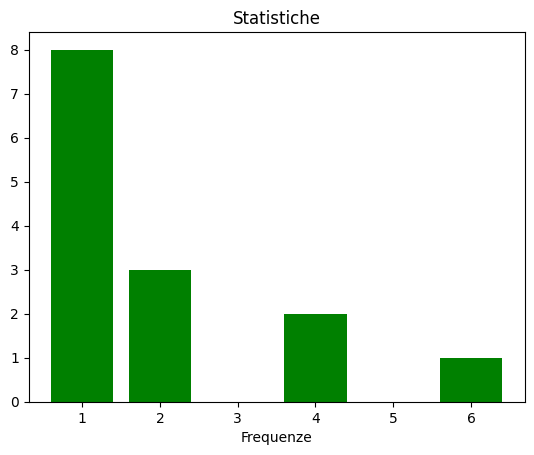

In [24]:
guesses = 0
user_inputs = game_init()
grid = grid_init()

game = True

while game:
    print_grid(user_inputs, grid)
    guess = input("Inserisci una parola (q)uit\n")
    guess = guess.lower()
    
    if guess == "q":
        game = False
    elif len(guess ) < 5 or len(guess) > 5:
        print("Lunghezza non consentita")
    elif guess not in words_bank:
        print("Parola non presente nel dizionario")
    else:
        user_inputs[guesses] = list(guess)
        guesses += 1
        if guess == todays_word:
            print(Fore.GREEN + f"Hai indovinato! La parola del giorno era {todays_word}")
            print(Fore.RESET + f"Ci hai messo {guesses} tentativi")
            update_stats(guesses)
            game = False
            print_stats()
            print_plt_stats()
        else:
            statuses = check_word(guess, todays_word)
            grid[guesses -1] = statuses
            
            